# **PINKSHEPZ'S Enterprise Project (PROJECT 7)**
## **SECTION 03: DATA ANALYTIC**
## Dataset
1. *Candlestick price*: XAUUSD TF 1D - 12 Oct 2020 to 8 May 2023
2. *Economic figure report*: FOREX FACTORY TF 1D - 13 Oct 2020 to 31 Dec 2022

## Analytics
1. Candlestick price distribution
    * Line: Time - %Change - Day of the week - Timezone
    * Scatter: %Change of n candlestick - %Change of n+1 candlestick
2. Economic figure distribution
3. Candlestick price x economic figure correlation

## **00 IMPORT & CONFIGURATION**

### **0.1 Install**

In [20]:
# %pip install tqdm

### **0.2 Import**

In [21]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates
import datetime as dt

from tqdm import tqdm

### **0.3 Global Configuration & Variables**

In [22]:
# configure fonts
FONT_PATH = "/workspaces/Enterprise/00_Pinksheepkit/fonts/poppins/Poppins-{0}.ttf"
# FONT_PATH = "c://Users//Art//Documents//A1-AspirePC//CS Project//07_Enterprise//Enterprise//00_Pinksheepkit//fonts//poppins//Poppins-{0}.ttf"
HEADING = "Bold"
LABEL = "Regular"
CONTENT = "Light"

# font properties **kwargs -> usage: plt.some_method(**H_FONT)
H_FONT = {"fontproperties": fm.FontProperties(fname=FONT_PATH.format(HEADING)), "size": 16}
L_FONT = {"fontproperties": fm.FontProperties(fname=FONT_PATH.format(LABEL)), "size": 14}
C_FONT = {"fontproperties": fm.FontProperties(fname=FONT_PATH.format(CONTENT)), "size": 12}

# configure pandas
pd.options.mode.chained_assignment = None  # default='warn'

# configure plt rc params
%matplotlib inline
mpl.rcParams['grid.color'] = '#f0f0f0'
plt.rcParams['figure.dpi'] = 300

In [23]:
# color palattes for candlestick chart
C_BULL = "#51A299"
C_BEAR = "#DD5E57"

C_SLATE500 = '#64748B'

# color from tailwind.css HSB500 https://tailwindcss.com/docs/customizing-colors
TRI_PALETTE = ['#F43F5E', '#F59E0B', '#6366F1'] # color theme for plotting: red yellow blue
UNI_PALETTE = ['#EF4444', "#F59E0B", "#FDE047", "#84CC16", 
               "#14B8A6", "#0EA5E9", "#3B82F6", "#8B5CF6", 
               "#D946EF", "#64748B", "#44403C"] # rainbow color theme
# HSB600
WEEK_PALETTE = {'MON': '#CA8A04', 
                'TUE': '#C026D3', 
                'WED': '#0D9488', 
                'THU': '#EA580C', 
                'FRI': '#0284C7', 
                'SAT': '#4F46E5',
                'SUN': '#E11D48'} # week of the day color

In [24]:
# global variables
TIME_ZONE_UTC = 7
QUOTE = "XAUUSD SPOT 1H"

## **01 DATA PREPARATION**

### **1.1 Import Dataset**

In [25]:
# path of two datasets
PATH_XAUUSD = '/workspaces/Enterprise/00_Pinksheepkit/universal_data/XAUUSD-1H_220103_230503.csv'
PATH_FOREX = '/workspaces/Enterprise/00_Pinksheepkit/universal_data/FOREX_220103_230513.csv'

In [26]:
# Read csv
df_xauusd = pd.read_csv(PATH_XAUUSD, parse_dates=['time']).drop(columns=['Unnamed: 0'])
df_forex = pd.read_csv(PATH_FOREX, parse_dates=[['date', 'time']],
                        keep_date_col=True).drop(columns=['Unnamed: 0'])

df_xauusd.rename(columns={'time': 'datetime'}, inplace=True)
df_forex.rename(columns={'date_time': 'datetime'}, inplace=True)

# get shape
print(f"XAUUSD: {df_xauusd.shape}")
print(f"FOREX: {df_forex.shape}")

XAUUSD: (8271, 6)
FOREX: (6386, 9)


In [27]:
# preview dataset 1 (XAUUSD)
df_xauusd.head()

,datetime,open,high,low,close,%Change
0,2022-01-03 05:00:00,1827.10,1829.03,1827.10,1829.03,0.1056
1,2022-01-03 06:00:00,1828.53,1831.57,1827.54,1827.98,-0.0301
2,2022-01-03 07:00:00,1828.20,1830.90,1826.66,1830.08,0.1028
3,2022-01-03 08:00:00,1830.13,1831.57,1826.44,1828.70,-0.0781
4,2022-01-03 09:00:00,1828.64,1828.81,1824.67,1825.99,-0.1449


In [28]:
# preview dataset 2 (FOREX)
df_forex.head()

,datetime,date,time,currency,impact,event,actual,forecast,previous
0,2023-05-11 21:30,2023-05-11,21:30,USD,Low,Natural Gas Storage,NaN,78B,54B
1,2023-05-11 15:00,2023-05-11,15:00,CNY,Medium,New Loans,719B,1400B,3890B
2,2023-05-11 11:00,2023-05-11,11:00,CHF,Medium,SNB Chairman Jordan Speaks,NaN,NaN,NaN
3,2023-05-11 0:01,2023-05-11,0:01,USD,Medium,10-y Bond Auction,NaN,NaN,3.46|2.4
4,2023-05-11 0:53,2023-05-11,0:53,USD,Low,Federal Budget Balance,176.2B,220.5B,-378.1B


### **1.2 Check Data Type**

In [29]:
# change dataype of df_xauusd
for col in df_xauusd.columns[1:]:
    df_xauusd[col] = df_xauusd[col].astype('float64')

In [30]:
# check data type of df_xauusd
df_xauusd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8271 entries, 0 to 8270
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  8271 non-null   datetime64[ns]
 1   open      8271 non-null   float64       
 2   high      8271 non-null   float64       
 3   low       8271 non-null   float64       
 4   close     8271 non-null   float64       
 5   %Change   8271 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 387.8 KB


In [31]:
## df_forex
## Configure datetime from datetime-like string
df_forex['datetime'] = pd.to_datetime(df_forex['datetime'].str.rstrip(' '),
                                        format='%Y-%m-%d %H:%M', errors="coerce").fillna(
    pd.to_datetime(df_forex['datetime'].str.rstrip(' '),
                    format='%Y-%m-%d', errors="coerce"))
df_forex['date'] = df_forex['datetime'].dt.strftime('%d %b')
df_forex['time'] = df_forex['time'].fillna('All Day')
df_forex['currency'] = df_forex['currency'].astype('category')
df_forex['impact'] = df_forex['impact'].astype('category')
df_forex['event'] = df_forex['event'].astype('category')

# Reilter df_forex after type configueation
df_forex = df_forex.loc[df_forex.datetime.notna(), :] # Valid date

# Sort values by datetime and reset index
df_forex = df_forex.sort_values(by=['datetime']).reset_index(drop=True)

## Create new nearest-hour-rounded datetime column in df_forex
## It will be used to connect df_xauusd datetime column
df_forex['h_datetime'] = df_forex.datetime.apply(lambda time: time.replace(
    second=0, microsecond=0, minute=0, hour=time.hour) + dt.timedelta(hours=time.minute//30))

# Create new %change column: display %change of xauusd in each economic news hour
df_forex['%change'] = df_forex['h_datetime'].apply(
    lambda time: df_xauusd.loc[df_xauusd.datetime == time, '%Change'].to_list()[0]
    if df_xauusd[df_xauusd.datetime == time].shape[0] > 0
    else np.nan)

# Swap column order
df_forex = df_forex.reindex(columns=[
    "datetime", "date", "time", "impact", "event", "actual", "forecast", "previous", "%change"])

In [33]:
# define function to handle various nember formats i.e. 100K 50%
def handle_number_format(number: str) -> list:
    """ Separate value and unit of given number formats
    
    Arg:
        1. number: str i.e. 6.5%, 100K, 2.8

    Out:
        1. list: <[float, str | None]> i.e. [6.5, "%"], [100, "K"], [2.8, None]
    """

    # case 1: na
    if number == '':
        return [None, None]
    number = str(number)
    # case 2: % value
    if (number[-1] == '%') & (number.lstrip('-')[0].isnumeric() is True):
        return [float(number.rstrip('%')), '%']
    # case 3: 1K 1M 1B 1T unit
    if (number[-1].isalpha() == True) & (number.lstrip('-')[0].isnumeric() is True):
        return [float(str(number)[:-1]), number[-1]]
    # case 4: ordinary numbers
    if number.replace(',', '').replace('.', '').lstrip('-').isnumeric() is True: 
        return [float(number.replace(',', '')), None]
    # case 5: non-numbers
    return [number, None]

# apply function
for col in tqdm(df_forex.columns[5:]):
    df_forex[col] = df_forex[col].fillna('').apply(handle_number_format)

100%|██████████| 4/4 [00:00<00:00, 29.93it/s]


In [34]:
# check data type
df_forex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6061 entries, 0 to 6060
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  6061 non-null   datetime64[ns]
 1   date      6061 non-null   object        
 2   time      6061 non-null   object        
 3   impact    6061 non-null   category      
 4   event     6061 non-null   category      
 5   actual    6061 non-null   object        
 6   forecast  6061 non-null   object        
 7   previous  6061 non-null   object        
 8   %change   6061 non-null   object        
dtypes: category(2), datetime64[ns](1), object(6)
memory usage: 368.9+ KB


## **02 CANDLESTICK EDA**

### **2.1 Descriptive Statistics**

In [35]:
# describe statistics of each column
df_xauusd.describe()

,datetime,open,high,low,close,%Change
count,8271,8271.000000,8271.000000,8271.000000,8271.000000,8271.000000
mean,2022-09-01 16:55:13.166485504,1830.425790,1832.880063,1827.481012,1830.438785,0.000833
min,2022-01-03 05:00:00,1616.560000,1620.440000,1614.090000,1616.670000,-1.918800
25%,2022-05-03 21:30:00,1760.360000,1762.685000,1757.560000,1760.360000,-0.090750
50%,2022-09-01 07:00:00,1828.710000,1831.330000,1825.880000,1828.670000,-0.004100
75%,2022-12-30 22:30:00,1912.510000,1915.045000,1908.420000,1912.470000,0.089900
max,2023-05-03 13:00:00,2069.480000,2070.430000,2051.050000,2069.320000,2.020200
std,NaN,99.467486,99.720986,99.318595,99.490533,0.193789


### **2.2 %Change Frequency & Datetime History**

#### **2.2.1 Volatility Density**

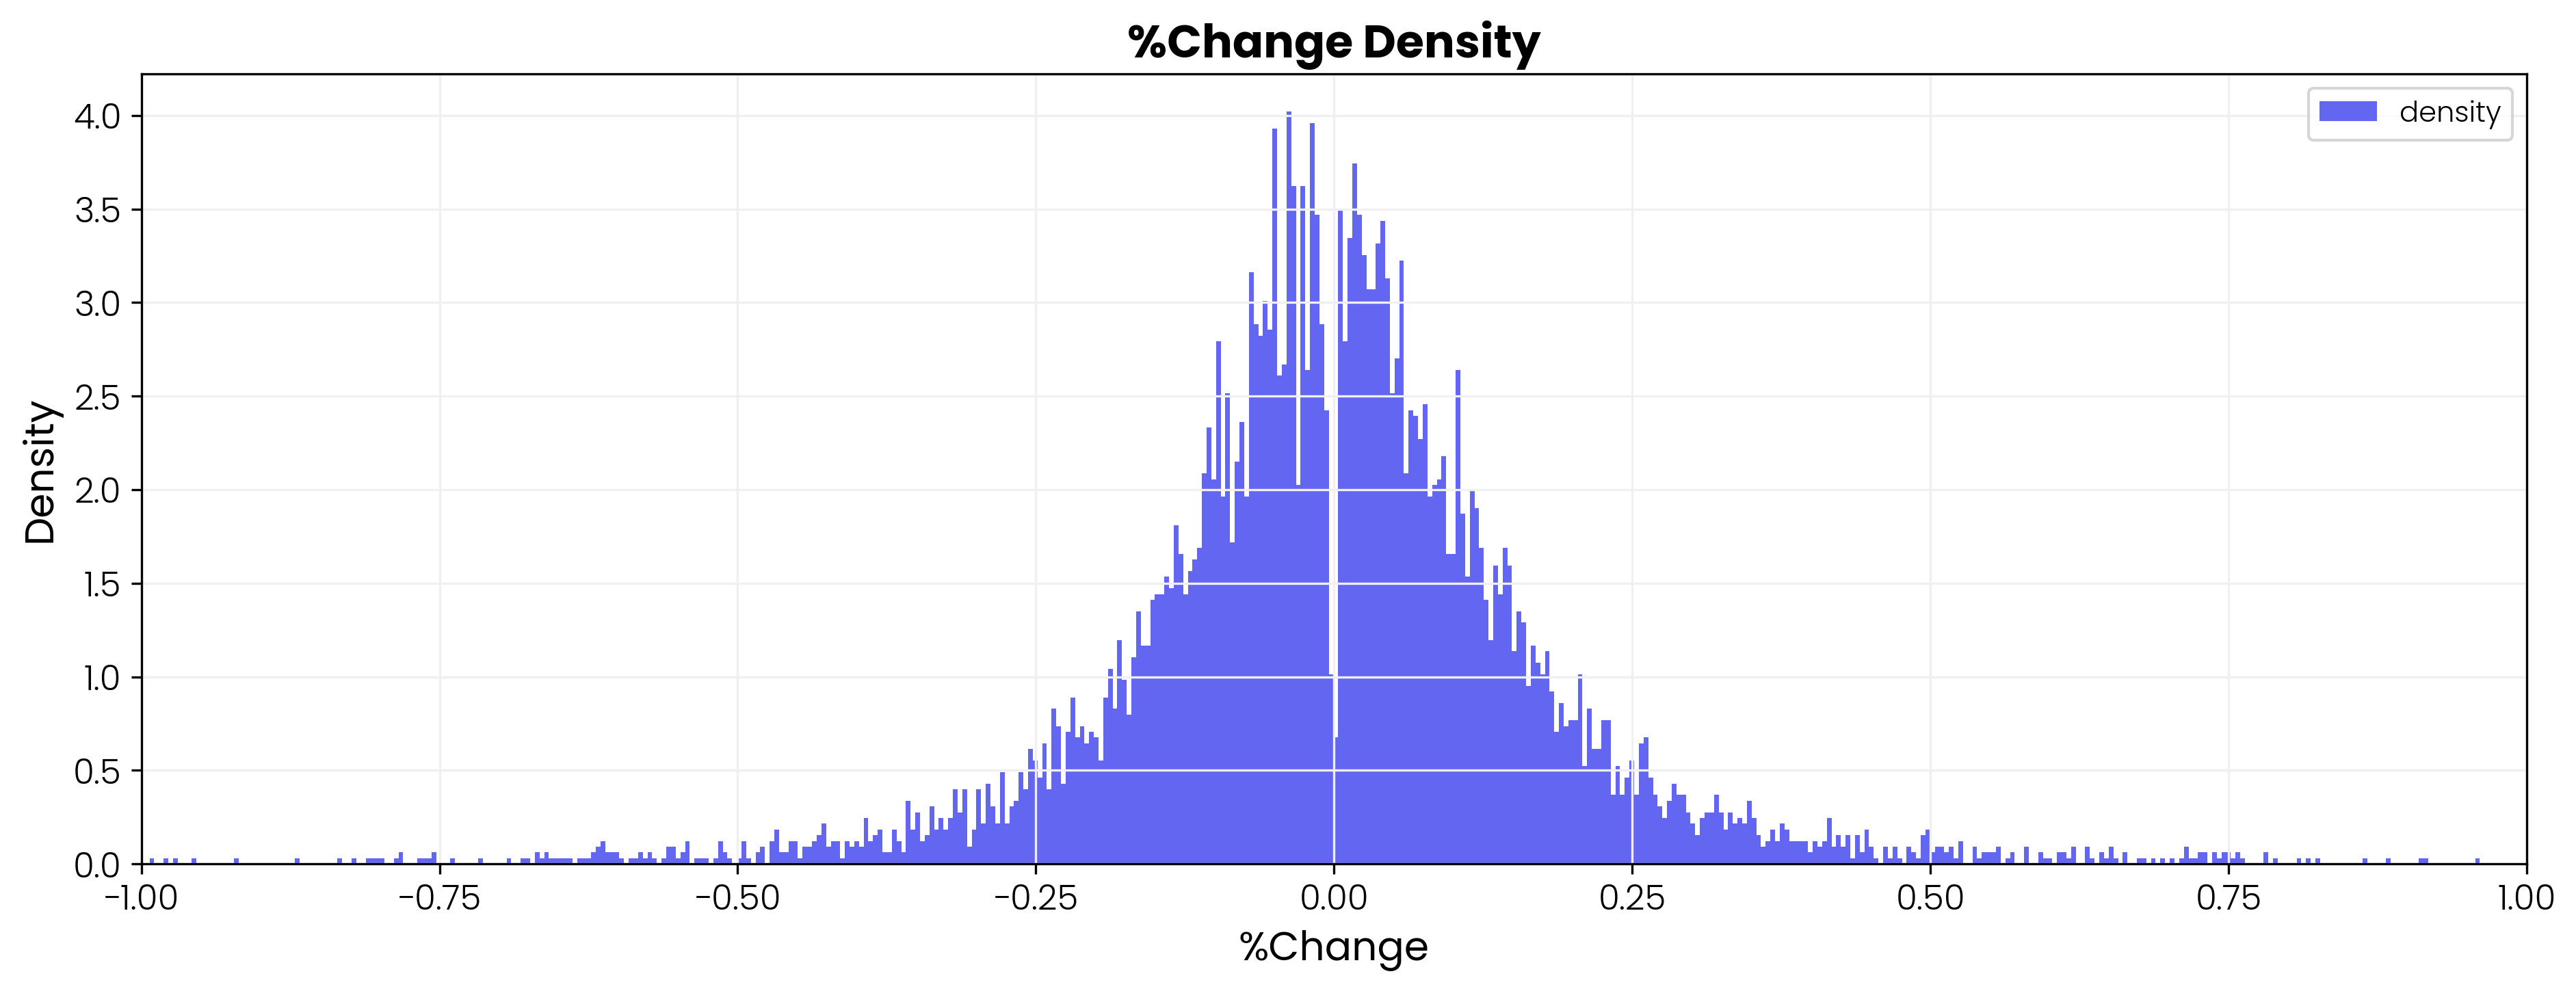

In [36]:
# plot histogram of %change frequency
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# plot hist
ax.hist(df_xauusd['%Change'], bins=1000, density=True, color=TRI_PALETTE[-1], label='density');

# format chart
ax.legend(bbox_to_anchor=(1, 1), prop=C_FONT['fontproperties'], fontsize=C_FONT['size'])
plt.xticks(**C_FONT)
plt.yticks(**C_FONT)
ax.set_title('%Change Density', **H_FONT)
ax.set_xlabel('%Change', **L_FONT)
ax.set_xlim([-1.0, 1.0])
ax.set_ylabel('Density', **L_FONT)
ax.grid(True)

#### **2.2.2 %Change/volatility History**

In [37]:
# create new DataFrame to calculate volatility index and readjust timeframe to 1 day
df_xauusd_1D = df_xauusd.loc[:, :]
df_xauusd_1D['datetime'] = pd.to_datetime(df_xauusd_1D['datetime'].dt.strftime("%Y%m%d"), format=("%Y%m%d"))
df_xauusd_1D['volatility'] = abs(df_xauusd_1D['%Change'])
df_xauusd_1D = df_xauusd_1D.groupby(by=['datetime']).agg({
    'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last', 'volatility': 'sum'
    }).reset_index()
df_xauusd_1D['%Change'] = df_xauusd_1D[['open', 'close']].apply(lambda x: 100 * (x[1] - x[0]) / x[0], axis=1)
df_xauusd_1D.head(5)

,datetime,open,high,low,close,volatility,%Change
0,2022-01-03,1827.10,1831.57,1797.36,1800.67,2.3298,-1.446555
1,2022-01-04,1800.78,1816.72,1797.74,1812.48,2.3215,0.649718
2,2022-01-05,1812.42,1829.64,1810.93,1823.84,1.7912,0.630097
3,2022-01-06,1823.73,1825.61,1786.21,1789.30,3.4752,-1.887889
4,2022-01-07,1789.19,1796.20,1782.40,1794.10,2.1120,0.274426


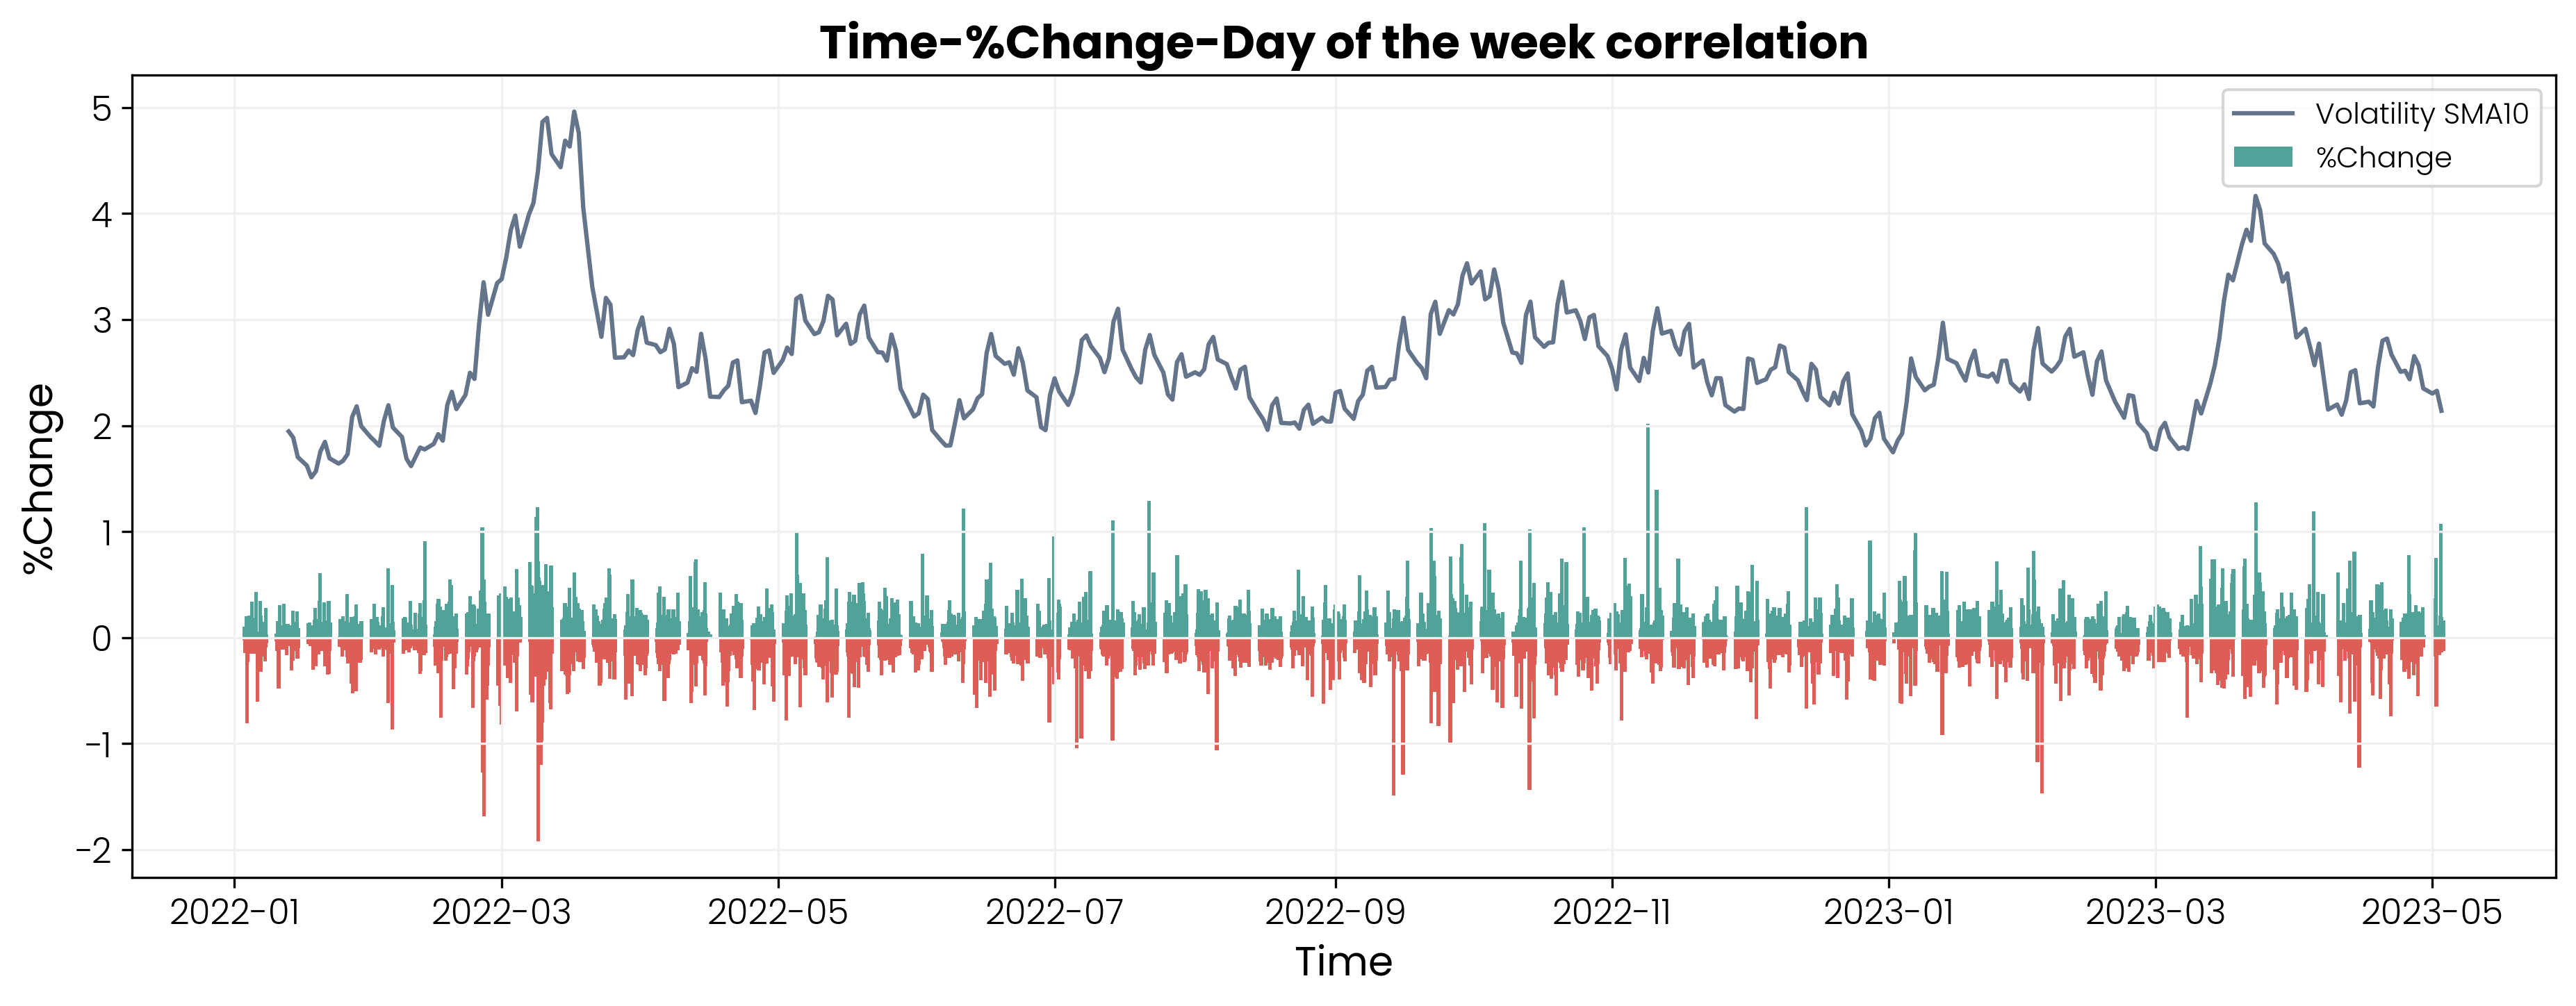

In [38]:
# plot bar chart for visualizing timeseries %Change
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# plot bar of %Change hourly
ax.bar(x=df_xauusd['datetime'], height=df_xauusd['%Change'], label='%Change', color=(
    df_xauusd['%Change'].apply(lambda x: C_BULL if x > 0 else C_BEAR)
))

# plot line of %volatility daily with moving average 10
ax.plot(df_xauusd_1D['datetime'], df_xauusd_1D['volatility'].rolling(10).mean(), 
        label='Volatility SMA10', c=C_SLATE500)

# format chart
ax.legend(bbox_to_anchor=(1, 1), prop=C_FONT['fontproperties'], fontsize=C_FONT['size'])
plt.xticks(**C_FONT)
plt.yticks(**C_FONT)
ax.set_title('Time-%Change-Day of the week correlation', **H_FONT)
ax.set_xlabel('Time', **L_FONT)
ax.set_ylabel('%Change', **L_FONT)
ax.grid(True)

plt.show()

In [39]:
# create new DataFrame with timeframe of 1 day in format mm-dd and spearate year as new feature
df_xauusd_1D_MD = df_xauusd_1D.loc[:, :]
df_xauusd_1D_MD['year'] = df_xauusd_1D_MD['datetime'].dt.year
df_xauusd_1D_MD['datetime'] = pd.to_datetime(df_xauusd_1D_MD['datetime'].dt.strftime("%m%d"), format=("%m%d"))
df_xauusd_1D_MD

,datetime,open,high,low,close,volatility,%Change,year
0,1900-01-03,1827.10,1831.57,1797.36,1800.67,2.3298,-1.446555,2022
1,1900-01-04,1800.78,1816.72,1797.74,1812.48,2.3215,0.649718,2022
2,1900-01-05,1812.42,1829.64,1810.93,1823.84,1.7912,0.630097,2022
3,1900-01-06,1823.73,1825.61,1786.21,1789.30,3.4752,-1.887889,2022
4,1900-01-07,1789.19,1796.20,1782.40,1794.10,2.1120,0.274426,2022
...,...,...,...,...,...,...,...,...
412,1900-04-28,1984.18,1995.06,1975.92,1991.42,1.7783,0.364886,2023
413,1900-04-29,1991.56,1992.89,1987.04,1989.66,0.1849,-0.095403,2023
414,1900-05-01,1991.14,2006.04,1976.75,1981.55,3.5599,-0.481634,2023
415,1900-05-02,1981.59,2019.41,1978.14,2015.08,2.8227,1.690057,2023


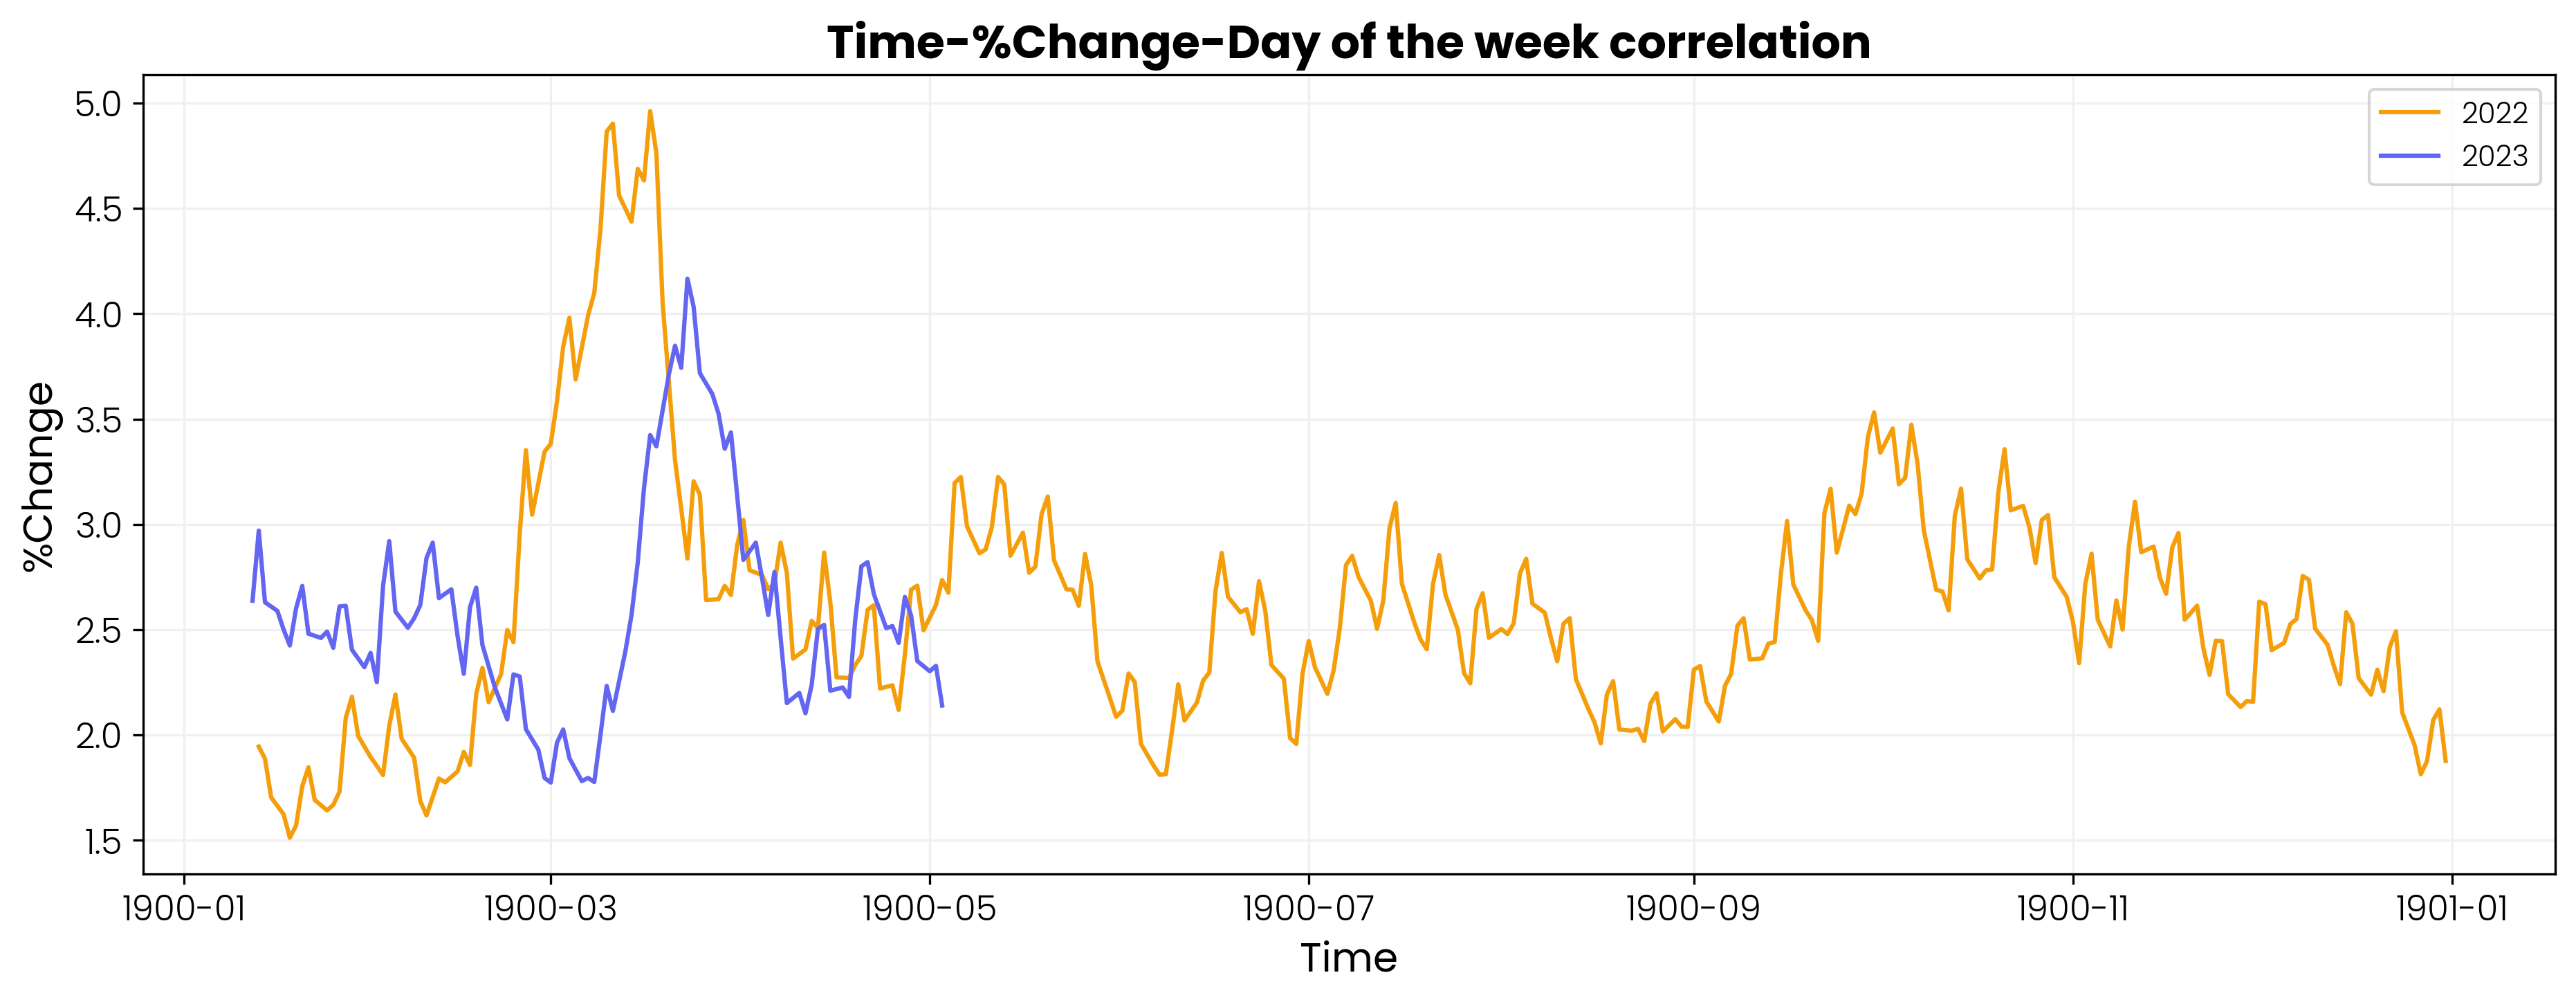

In [40]:
# plot bar chart for visualizing timeseries %Change
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# plot line of %volatility daily with moving average 10 in 2022 and 2023
ax.plot(df_xauusd_1D_MD[df_xauusd_1D_MD['year']==2022]['datetime'], df_xauusd_1D[df_xauusd_1D_MD['year']==2022]['volatility'].rolling(10).mean(), 
        label='2022', c=TRI_PALETTE[1])
ax.plot(df_xauusd_1D_MD[df_xauusd_1D_MD['year']==2023]['datetime'], df_xauusd_1D[df_xauusd_1D_MD['year']==2023]['volatility'].rolling(10).mean(), 
        label='2023', c=TRI_PALETTE[2])

# format chart
ax.legend(bbox_to_anchor=(1, 1), prop=C_FONT['fontproperties'], fontsize=C_FONT['size'])
plt.xticks(**C_FONT)
plt.yticks(**C_FONT)
ax.set_title('Time-%Change-Day of the week correlation', **H_FONT)
ax.set_xlabel('Time', **L_FONT)
ax.set_ylabel('%Change', **L_FONT)
ax.grid(True)

#### **2.2.3 %Change by Day of the Week**

In [41]:
df_xauusd_A = df_xauusd.loc[:, ['datetime', '%Change']]
df_xauusd_A["hour"] = df_xauusd_A["datetime"].dt.hour
df_xauusd_A["weekday"] = df_xauusd_A["datetime"].dt.weekday
df_xauusd_A["%Change"] = abs(df_xauusd_A["%Change"])
df_xauusd_A = df_xauusd_A.iloc[:, 1:]
df_xauusd_A = df_xauusd_A.pivot_table(index='hour', columns='weekday', values='%Change', aggfunc='mean')
df_xauusd_A.columns = [*WEEK_PALETTE.keys()][:-1]

In [42]:
df_xauusd_A.head()

,MON,TUE,WED,THU,FRI,SAT
hour,,,,,,
0,NaN,0.122276,0.146383,0.117262,0.131491,0.141449
1,NaN,0.123936,0.133813,0.188294,0.119312,0.135310
2,NaN,0.101046,0.104307,0.166406,0.124130,0.089388
3,NaN,0.069515,0.074301,0.083786,0.096526,0.096297
4,NaN,0.045049,0.043463,0.048068,0.049517,0.053160


In [43]:
# New York 8am to 5pm EST (1pm to 10pm UTC)
# Tokyo 7pm to 4am EST (12am to 9am UTC)
# Sydney 5pm to 2am EST (10pm to 7am UTC)
# London 3am to 12 noon EST (8am to 5pm UTC)
TZ = {
    'USD': [20, 5],
    'JPY': [7, 16],
    'AUD': [5, 14],
    'GBP': [15, 0]
}

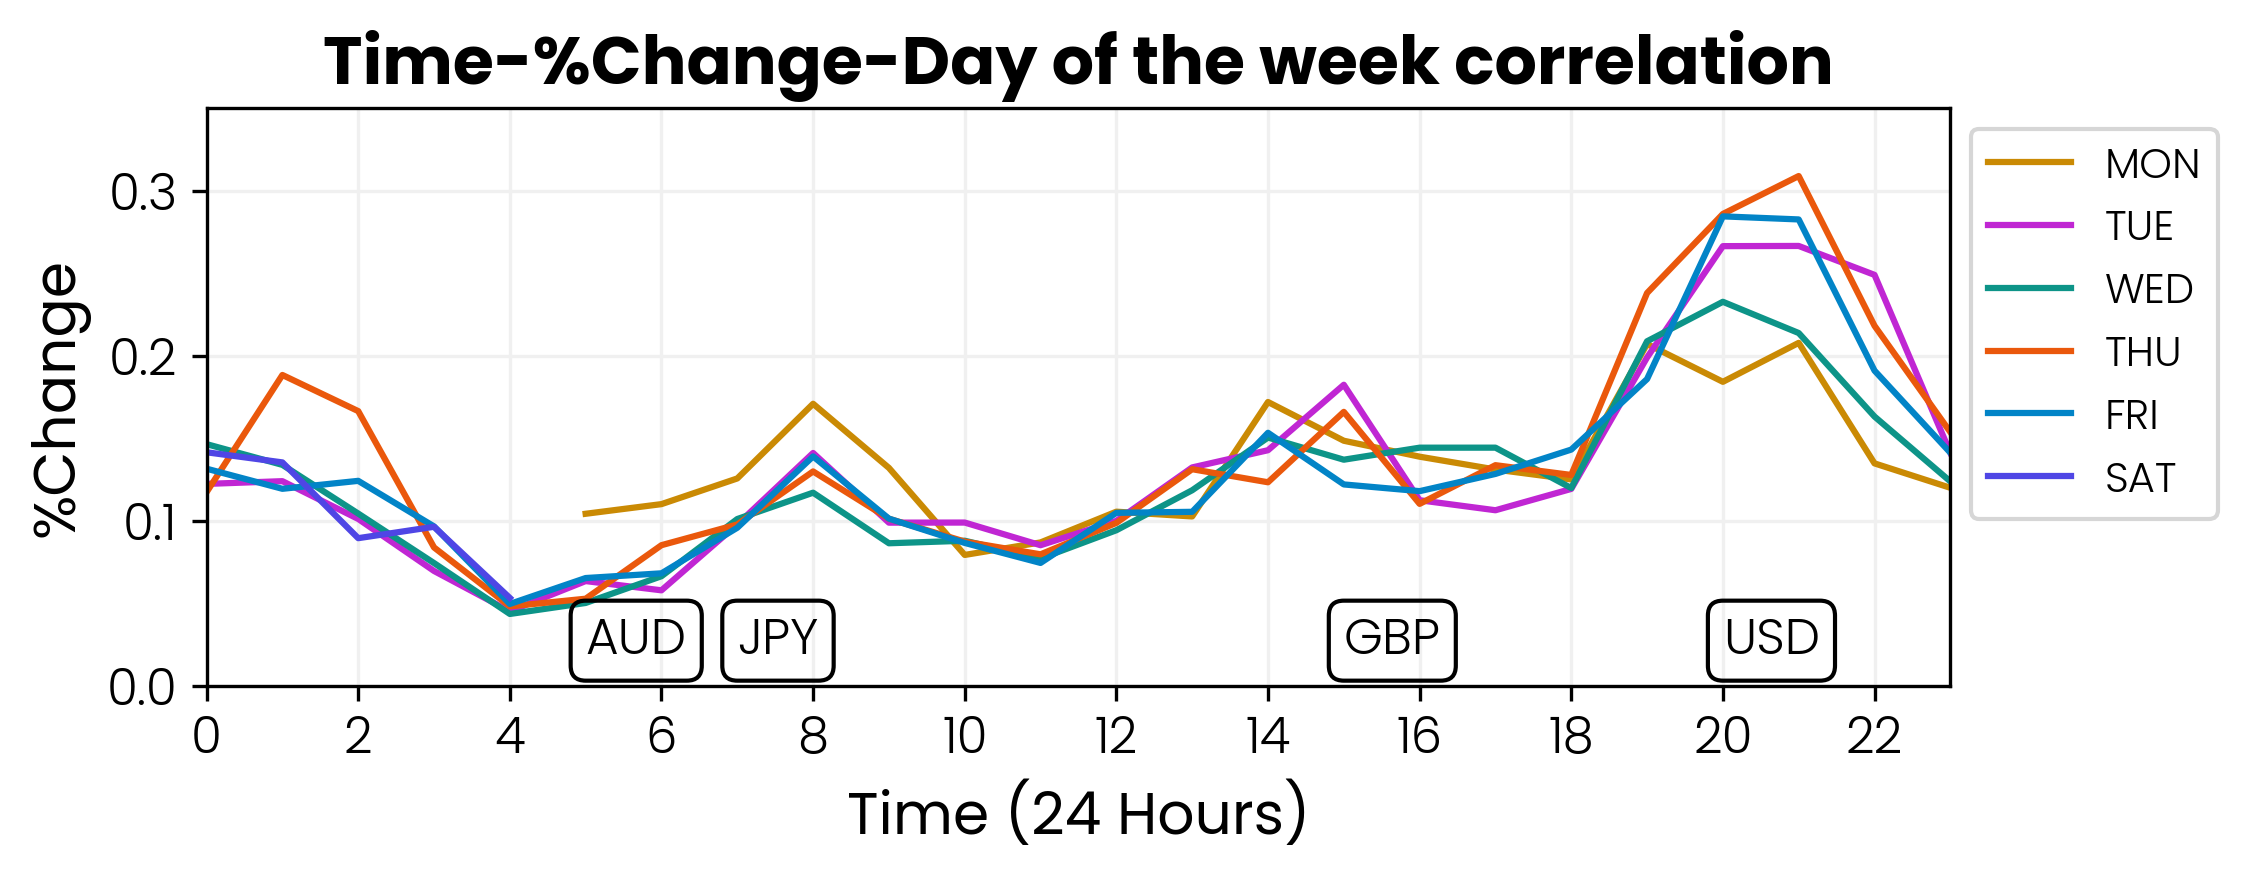

In [44]:
# Plot scatter charts
fig, ax = plt.subplots(1, 1, figsize=(7.5, 2.5))

for column in df_xauusd_A.columns:
    ax.plot(df_xauusd_A.index, 
            df_xauusd_A[column], 
            label=column,
            c=WEEK_PALETTE[column])

for tz in TZ:
    ax.text(TZ[tz][0], 0.02, tz, color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'), **C_FONT)

# Format charts
ax.legend(bbox_to_anchor=(1, 1), prop=C_FONT['fontproperties'], fontsize=C_FONT['size'])
plt.xticks(**C_FONT)
plt.yticks(**C_FONT)
ax.set_title('Time-%Change-Day of the week correlation', **H_FONT)
ax.set_xlabel('Time (24 Hours)', **L_FONT)
ax.set_xticks(np.arange(0, 24, 2))
ax.set_xlim([0, 23])
ax.set_ylabel('%Change', **L_FONT)
ax.set_ylim([0, 0.35])
ax.grid(True)

#### **2.2.4 %Change of n - i VS n + i candlesticks**

In [45]:
# df_xauusd_B = pd.concat([round(df_xauusd.loc[0: df_xauusd.shape[0] - 4, ['%Change']].reset_index(drop=True), 1),
#                          round(df_xauusd.loc[1: df_xauusd.shape[0] - 3, ['%Change']].reset_index(drop=True), 1),
#                          round(df_xauusd.loc[2: df_xauusd.shape[0] - 2, ['%Change']].reset_index(drop=True), 1),
#                          round(df_xauusd.loc[3: df_xauusd.shape[0] - 1, ['%Change']].reset_index(drop=True), 1)],
#                          axis=1)

FRAME = 3
PRECISION = 2

df_xauusd_FRAME = pd.concat([round(df_xauusd.loc[frame: df_xauusd.shape[0] - ((frame * 2) - frame), ['%Change']].reset_index(drop=True), PRECISION)
                         for frame in range(FRAME * 2)],
                         axis=1)

df_xauusd_FRAME.columns = ['i_' + str(frame) for frame in range(FRAME * 2)]

df_xauusd_B = pd.concat([pd.DataFrame({('i_' + str(i + 1) + str(j)): abs(df_xauusd_FRAME.iloc[:, ((i + 1) * j): ((i + 1) * (j + 1))].sum(axis=1))})
                         for (i, j) in zip(sorted([frame for frame in range(FRAME)] * 2), [0, 1] * FRAME)],
                         axis=1)

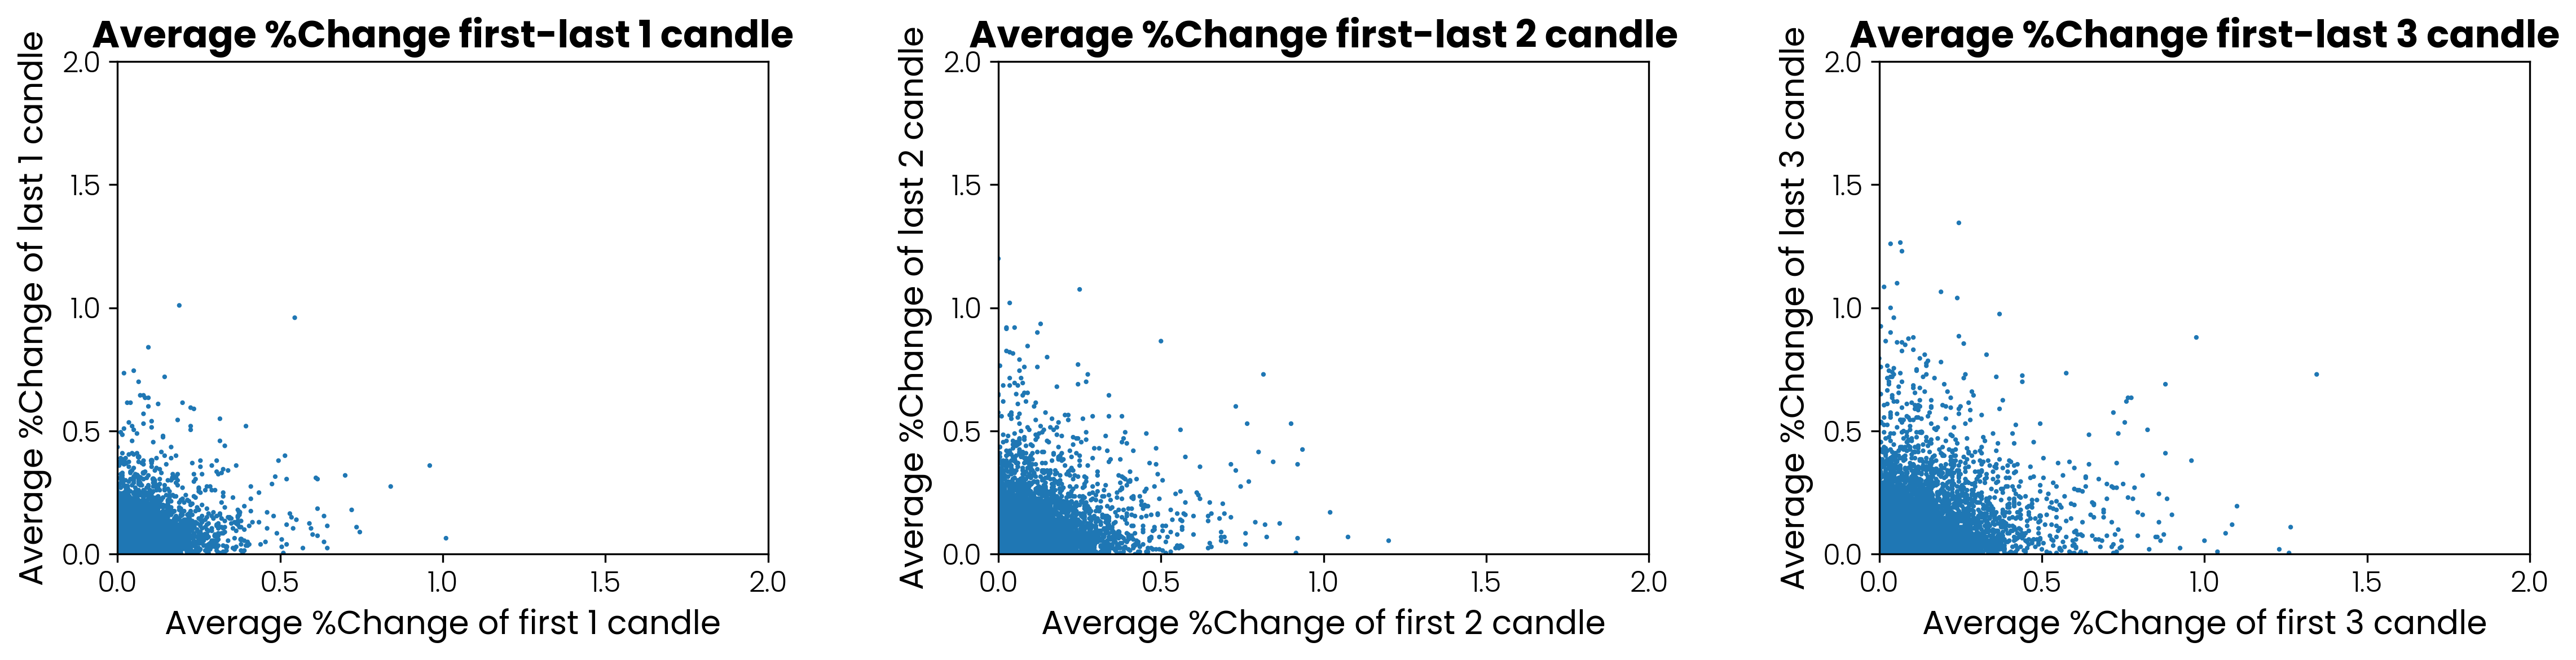

In [54]:
# Plot scatter charts
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

for i in range(3):
    selected_cols = df_xauusd_B.iloc[:, (2 * i): (2 * i) + 2]
    selected_cols = selected_cols.groupby(selected_cols.columns.to_list(), as_index=False).size()
    x, y, s = selected_cols.iloc[:, 0], selected_cols.iloc[:, 1], selected_cols.iloc[:, -1]
    ax[i].scatter(x, y, s=s)
    ax[i].set_title(f'Average %Change first-last {i + 1} candle', **H_FONT)
    ax[i].set_xlabel(f'Average %Change of first {i + 1} candle', **L_FONT)
    ax[i].set_ylabel(f'Average %Change of last {i + 1} candle', **L_FONT)
    ax[i].set_xlim([0, 2])
    ax[i].set_ylim([0, 2])
    ax[i].set_xticks(np.arange(5), np.arange(0, 2.5, 0.5), **C_FONT)
    ax[i].set_yticks(np.arange(5), np.arange(0, 2.5, 0.5), **C_FONT)

# Format charts
plt.tight_layout()
plt.subplots_adjust(right=1.5)

### **2.3 Candlestick Pattern**

#### **2.3.1 Candlestick Feature Classification**

In [47]:
df_xauusd.head(1)

,datetime,open,high,low,close,%Change
0,2022-01-03 05:00:00,1827.1,1829.03,1827.1,1829.03,0.1056


In [71]:
# implement features
dfx_xauusd = df_xauusd.iloc[:, :]

## 1. bullish = +, bearish = -
dfx_xauusd['f_bb'] = dfx_xauusd['%Change'].apply(lambda x: '+' if x >= 0 else '-')

## 2. %volatility S M L XL
vola_bins = [0, 0.25, 0.50, 1.00, np.inf]
vola_labels = ['S', 'M', 'L', 'XL']

dfx_xauusd['f_vola'] = pd.cut(abs(dfx_xauusd['%Change']), bins=vola_bins, labels=vola_labels)

## 3. wick patterns
wick_bins = [-1, 0, 1, np.inf]
wick_labels = [0, 1, 2]
f_candle = dfx_xauusd[['open', 'high', 'low', 'close']].apply(lambda x: sorted(x)[2] - sorted(x)[1], axis=1)
dfx_xauusd['f_w+'] = pd.cut(dfx_xauusd[['open', 'high', 'low', 'close']].apply(
    lambda x: sorted(x)[3] - sorted(x)[2], axis=1) / f_candle,
    bins=wick_bins, labels=wick_labels)
dfx_xauusd['f_w-'] = pd.cut(dfx_xauusd[['open', 'high', 'low', 'close']].apply(
    lambda x: sorted(x)[1] - sorted(x)[0], axis=1) / f_candle,
    bins=wick_bins, labels=wick_labels)
dfx_xauusd['type'] = dfx_xauusd[['f_bb', 'f_vola', 'f_w+', 'f_w-']].apply(
    lambda x: ''.join(list(x.astype(str))), axis=1)

dfx_xauusd

,datetime,open,high,low,close,%Change,f_bb,f_vola,f_w+,f_w-,type
0,2022-01-03 05:00:00,1827.10,1829.03,1827.10,1829.03,0.1056,+,S,0,0,+S00
1,2022-01-03 06:00:00,1828.53,1831.57,1827.54,1827.98,-0.0301,-,S,2,1,-S21
2,2022-01-03 07:00:00,1828.20,1830.90,1826.66,1830.08,0.1028,+,S,1,1,+S11
3,2022-01-03 08:00:00,1830.13,1831.57,1826.44,1828.70,-0.0781,-,S,2,2,-S22
4,2022-01-03 09:00:00,1828.64,1828.81,1824.67,1825.99,-0.1449,-,S,1,1,-S11
...,...,...,...,...,...,...,...,...,...,...,...
8266,2023-05-03 09:00:00,2016.83,2018.81,2016.14,2017.11,0.0139,+,S,2,2,+S22
8267,2023-05-03 10:00:00,2017.01,2018.72,2016.64,2018.54,0.0759,+,S,1,1,+S11
8268,2023-05-03 11:00:00,2018.54,2019.60,2015.45,2015.95,-0.1283,-,S,1,1,-S11
8269,2023-05-03 12:00:00,2015.95,2016.60,2014.15,2014.85,-0.0546,-,S,1,1,-S11


#### **2.3.2 Candlestick types connectivity**

In [119]:
# Crosstab of candlestick types
pd.set_option('display.max_columns', None)
df_cross_candle_types = pd.DataFrame({'i1': dfx_xauusd.iloc[0:-1, -1].reset_index(drop=True),
                                    'i2': dfx_xauusd.iloc[1:, -1].reset_index(drop=True),
                                    'count': 1}).groupby(by=['i1', 'i2']).agg('count').reset_index()

df_cross_candle_types = df_cross_candle_types[df_cross_candle_types['i1'].str.contains('L', regex=False)]

df_cross_candle_types.sort_values(by='count', ascending=False).head(50)

,i1,i2,count
11,+L11,-M11,19
7,+L11,+S22,13
16,+L11,-S22,13
3,+L11,+M11,11
257,-L11,-S22,11
255,-L11,-S12,10
248,-L11,+S11,10
4,+L11,+S11,9
243,-L11,+L11,8
253,-L11,-M11,8
